<H3> 1. Instalación del paquete dataset-tools

* El paquete dataset-tools proporciona herramientas para descargar y gestionar datasets de forma sencilla, como el CBIS-DDSM.

In [ ]:
# Instalamos el paquete dataset-tools que nos permitirá descargar el dataset CBIS-DDSM
!pip install --upgrade dataset-tools


<H3> 2. Importar el paquete y descargar el dataset CBIS-DDSM

* Ahora procederemos a descargar el conjunto de datos CBIS-DDSM directamente en la carpeta ~/dataset-ninja/.

In [ ]:
# 1. Importar el paquete y descargar el dataset directamente en /content/
import dataset_tools as dtools

# Descargar el dataset CBIS-DDSM en el directorio /content/cbis-ddsm/
dtools.download(dataset='CBIS-DDSM', dst_dir='/content/cbis-ddsm/')


Unpacking 'cbis-ddsm.tar': 100%|██████████| 6209/6209 [01:43<00:00, 59.85file/s]


'/content/cbis-ddsm/cbis-ddsm'

<H3> 3. Exploración del dataset

* Puedes explorar las carpetas de entrenamiento y prueba para ver los archivos de imágenes y anotaciones.

In [ ]:
import os

# Definir la ruta del dataset descargado
dataset_dir = '/content/cbis-ddsm/'

# Función para recorrer solo la estructura de carpetas
for root, dirs, files in os.walk(dataset_dir):
    level = root.replace(dataset_dir, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f'{indent}{os.path.basename(root)}/')


/
cbis-ddsm/
    test/
        img/
        ann/
    train/
        img/
        ann/


### 3.1 Listar archivos

* Listar archivos del conjunto de entrenamiento y prueba


In [ ]:
import os
import pandas as pd
from IPython.display import display

# Definir la ruta de la carpeta de imágenes de entrenamiento (train)
train_img_dir = '/content/cbis-ddsm/cbis-ddsm/train/img'

# Listar los archivos en la carpeta de entrenamiento
train_files = os.listdir(train_img_dir)

# Crear un DataFrame para 'train'
train_df = pd.DataFrame({'Archivo': train_files, 'Carpeta': ['train'] * len(train_files)})

# Mostrar la lista de archivos de 'train'
print("Archivos en el conjunto de entrenamiento (train):")
display(train_df)


Archivos en el conjunto de entrenamiento (train):


,Archivo,Carpeta
0,Mass-Training_P_00818_RIGHT_MLO_FULL_PRE.png,train
1,Mass-Training_P_01104_LEFT_MLO_FULL_PRE.png,train
2,Calc-Training_P_02572_LEFT_CC_FULL_PRE.png,train
3,Mass-Training_P_00569_RIGHT_MLO_FULL_PRE.png,train
4,Calc-Training_P_01582_LEFT_CC_FULL_PRE.png,train
...,...,...
2453,Mass-Training_P_00205_RIGHT_CC_FULL_PRE.png,train
2454,Calc-Training_P_02234_LEFT_MLO_FULL_PRE.png,train
2455,Calc-Training_P_01392_LEFT_CC_FULL_PRE.png,train
2456,Calc-Training_P_01220_RIGHT_CC_FULL_PRE.png,train


In [ ]:
import os
import pandas as pd
from IPython.display import display

# Definir la ruta de la carpeta de imágenes de prueba (test)
test_img_dir = '/content/cbis-ddsm/cbis-ddsm/test/img'

# Listar los archivos en la carpeta de prueba
test_files = os.listdir(test_img_dir)

# Crear un DataFrame para 'test'
test_df = pd.DataFrame({'Archivo': test_files, 'Carpeta': ['test'] * len(test_files)})

# Mostrar la lista de archivos de 'test'
print("\nArchivos en el conjunto de prueba (test):")
display(test_df)



Archivos en el conjunto de prueba (test):


,Archivo,Carpeta
0,Calc-Test_P_00315_LEFT_MLO_FULL_PRE.png,test
1,Calc-Test_P_00325_RIGHT_MLO_FULL_PRE.png,test
2,Mass-Test_P_00544_LEFT_CC_FULL_PRE.png,test
3,Mass-Test_P_01510_RIGHT_MLO_FULL_PRE.png,test
4,Calc-Test_P_02275_LEFT_CC_FULL_PRE.png,test
...,...,...
640,Mass-Test_P_00524_LEFT_CC_FULL_PRE.png,test
641,Mass-Test_P_00707_RIGHT_MLO_FULL_PRE.png,test
642,Mass-Test_P_00922_RIGHT_CC_FULL_PRE.png,test
643,Mass-Test_P_01294_RIGHT_MLO_FULL_PRE.png,test


### 3.2 Visualización de una imagen de mamografía del conjunto de entrenamiento

* Cargar y mostrar una imagen de mamografía del conjunto de entrenamiento usando matplotlib, sin ejes y en escala de grises.

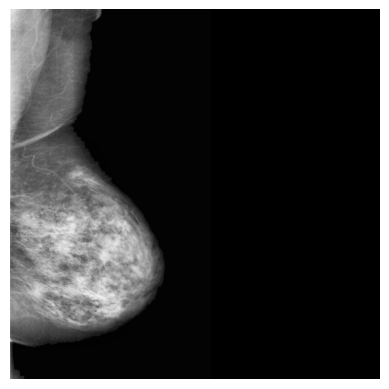

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar y mostrar una imagen de ejemplo del conjunto de entrenamiento
img_path = '/content/cbis-ddsm/cbis-ddsm/train/img/Calc-Training_P_00013_RIGHT_MLO_FULL_PRE.png'  # Reemplaza con el nombre de una imagen listada
img = mpimg.imread(img_path)
plt.imshow(img, cmap='gray')  # Mostrar en escala de grises si es necesario
plt.axis('off')  # Quitar los ejes
plt.show()

### 4. Lee correctamente el Json y muestra la región anómala recortada

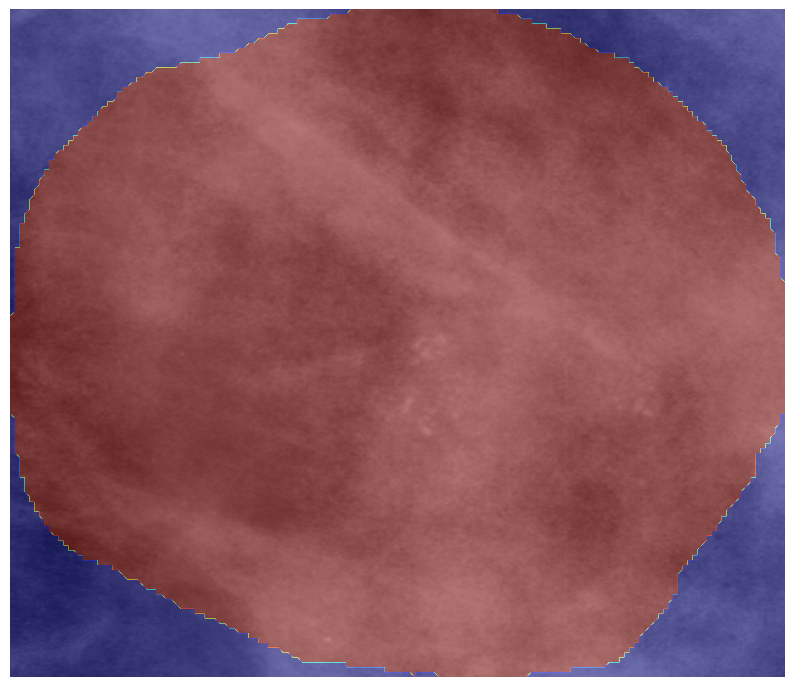

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import base64
from io import BytesIO
import zlib  # Import zlib for decompression

# Function to decode the bitmap from base64 to a numpy array
def decode_bitmap(bitmap_data, width, height):
    # Decode the bitmap from base64
    try:
        bitmap_bytes = base64.b64decode(bitmap_data.encode('utf-8'))  # Encode to bytes for decoding
        # Check if the bitmap data is compressed using zlib
        try:
            bitmap_bytes = zlib.decompress(bitmap_bytes)  # Decompress the data if compressed
        except zlib.error:
            pass  # If decompression fails, it might not be compressed

        # Convert to image using PIL and then to a numpy array
        img = Image.open(BytesIO(bitmap_bytes))
        bitmap_array = np.array(img)
        return bitmap_array
    except Exception as e:
        print(f"Error decoding bitmap: {e}")  # Print the error for debugging
        return None

# Function to load the mammography image
def load_image(image_path):
    image = Image.open(image_path)
    return np.array(image)

# Load the example JSON file (annotations)
json_path = '/content/cbis-ddsm/cbis-ddsm/train/ann/Calc-Training_P_00005_RIGHT_CC_FULL_PRE.png.json'
with open(json_path, 'r') as f:
    annotations = json.load(f)

# Get the mammography image
image_path = '/content/cbis-ddsm/cbis-ddsm/train/img/Calc-Training_P_00005_RIGHT_CC_FULL_PRE.png'
mammo_image = load_image(image_path)

# Get the image dimensions from the JSON
width = annotations['size']['width']
height = annotations['size']['height']

# Get the bitmap data from the JSON (the mask of the anomalous region)
bitmap_data = annotations['objects'][0]['bitmap']['data']
origin = annotations['objects'][0]['bitmap']['origin']

# Decode the bitmap into an array
bitmap_mask = decode_bitmap(bitmap_data, width, height)

# Display the image with the mask of the anomalous region
if bitmap_mask is not None:  # Check if the bitmap mask was successfully decoded
    plt.figure(figsize=(10, 10))
    plt.imshow(mammo_image, cmap='gray')
    plt.imshow(bitmap_mask, cmap='jet', alpha=0.5, extent=(origin[0], origin[0] + bitmap_mask.shape[1], origin[1], origin[1] + bitmap_mask.shape[0]))
    plt.axis('off')
    plt.show()
else:
    print("Error: Bitmap mask could not be decoded.")

### Muestra la mamografía completa junto a la región anómala detectada

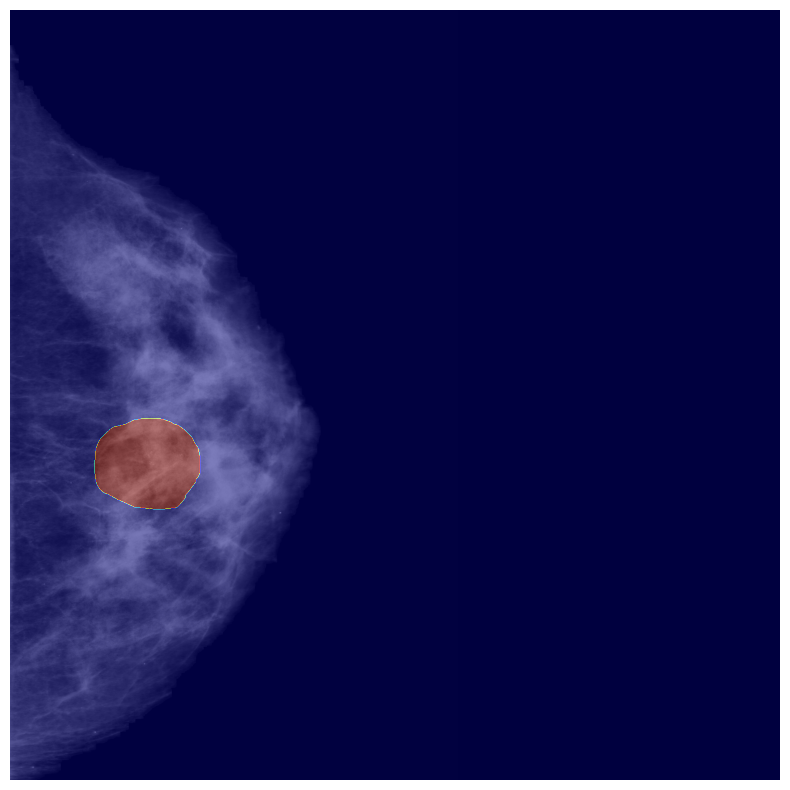

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import base64
from io import BytesIO
import zlib  # Import zlib for decompression

# Function to decode the bitmap from base64 to a numpy array
def decode_bitmap(bitmap_data, width, height):
    # Decode the bitmap from base64
    try:
        bitmap_bytes = base64.b64decode(bitmap_data.encode('utf-8'))  # Encode to bytes for decoding
        # Check if the bitmap data is compressed using zlib
        try:
            bitmap_bytes = zlib.decompress(bitmap_bytes)  # Decompress the data if compressed
        except zlib.error:
            pass  # If decompression fails, it might not be compressed

        # Convert to image using PIL and then to a numpy array
        img = Image.open(BytesIO(bitmap_bytes))
        bitmap_array = np.array(img)
        return bitmap_array
    except Exception as e:
        print(f"Error decoding bitmap: {e}")  # Print the error for debugging
        return None

# Function to load the mammography image
def load_image(image_path):
    image = Image.open(image_path)
    return np.array(image)

# Load the example JSON file (annotations)
json_path = '/content/cbis-ddsm/cbis-ddsm/train/ann/Calc-Training_P_00005_RIGHT_CC_FULL_PRE.png.json'
with open(json_path, 'r') as f:
    annotations = json.load(f)

# Get the mammography image
image_path = '/content/cbis-ddsm/cbis-ddsm/train/img/Calc-Training_P_00005_RIGHT_CC_FULL_PRE.png'
mammo_image = load_image(image_path)

# Get the image dimensions from the JSON
width = annotations['size']['width']
height = annotations['size']['height']

# Get the bitmap data from the JSON (the mask of the anomalous region)
bitmap_data = annotations['objects'][0]['bitmap']['data']
origin = annotations['objects'][0]['bitmap']['origin']


# Decode the bitmap into an array
bitmap_mask = decode_bitmap(bitmap_data, width, height)

# Display the image with the mask of the anomalous region
if bitmap_mask is not None:
    # Create an empty mask of the same size as the mammogram image
    full_mask = np.zeros_like(mammo_image)

    # Calculate the coordinates where to place the bitmap mask
    x_start = int(origin[0])
    y_start = int(origin[1])
    x_end = x_start + bitmap_mask.shape[1]
    y_end = y_start + bitmap_mask.shape[0]


    # Place the bitmap mask into the full mask
    full_mask[y_start:y_end, x_start:x_end] = bitmap_mask


    plt.figure(figsize=(10, 10))
    plt.imshow(mammo_image, cmap='gray')
    plt.imshow(full_mask, cmap='jet', alpha=0.5) # Now use full_mask here
    plt.axis('off')
    plt.show()
else:
    print("Error: Bitmap mask could not be decoded.")